<Figure size 2000x800 with 0 Axes>

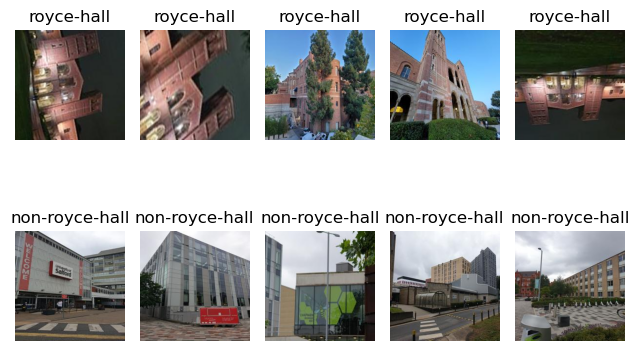

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

#define a function for plotting images 
def plot_sample_images(dataset_path, class_names, img_height=224, img_width=224, grid_rows=2, grid_cols=5):
    """
    Plots a grid of sample images from the train set
    
    :param dataset_path: Path to the dataset directory
    :param class_names: List of class names (subdirectory names)
    :param img_height: Image height
    :param img_width: Image width
    :param grid_rows: Number of rows in the grid
    :param grid_cols: Number of columns in the grid
    """
    plt.figure(figsize=(20, 8))
    plt.figure().clear()
    for row in range(grid_rows):
        class_path = os.path.join(dataset_path, class_names[row])
        images = os.listdir(class_path)
        sampled_images = random.sample(images, grid_cols)

        for col in range(grid_cols):
            img_path = os.path.join(class_path, sampled_images[col])
            img = load_img(img_path, target_size=(img_height, img_width))
            plt.subplot(grid_rows, grid_cols, row * grid_cols + col + 1)
            plt.imshow(img)
            plt.title(class_names[row])
            plt.axis('off')

    plt.tight_layout()
    plt.show()

dataset_path = 'dataset/train_set/'
class_names = ['royce-hall', 'non-royce-hall']  
plot_sample_images(dataset_path, class_names)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

#defining the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


train_datagen = ImageDataGenerator(rescale=1./255) #rescale image

validation_datagen = ImageDataGenerator(rescale=1./255)#rescale image

train_generator = train_datagen.flow_from_directory(
        'dataset/train_set',  #path for train images
        target_size=(224, 224),  
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'dataset/valid_set', #path for valid images
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n // train_generator.batch_size,
      epochs=20, #change with desired number of epocjs 
      validation_data=validation_generator,
      validation_steps=validation_generator.n // validation_generator.batch_size)


Found 209 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Epoch 1/20
6/6 [==============================] - 3s 406ms/step - loss: 2.6938 - accuracy: 0.4689 - val_loss: 0.6802 - val_accuracy: 0.5312
Epoch 2/20
6/6 [==============================] - 2s 388ms/step - loss: 0.6850 - accuracy: 0.7458 - val_loss: 0.7291 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 2s 358ms/step - loss: 0.6036 - accuracy: 0.7288 - val_loss: 0.7842 - val_accuracy: 0.4688
Epoch 4/20
6/6 [==============================] - 2s 385ms/step - loss: 0.5202 - accuracy: 0.7344 - val_loss: 0.7367 - val_accuracy: 0.4688
Epoch 5/20
6/6 [==============================] - 2s 358ms/step - loss: 0.3716 - accuracy: 0.7401 - val_loss: 0.5273 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 2s 418ms/step - loss: 0.2612 - accuracy: 0.9209 - val_loss: 0.2660 - val_accuracy: 0.9062
Epoch 7/20
6/6 [==============================] - 2s 365ms/step - loss: 0.1217 

In [3]:
#test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Found 36 images belonging to 2 classes.
2/2 [==============================] - 0s 16ms/step - loss: 0.0793 - accuracy: 0.9722
Test Loss: 0.07932857424020767, Test Accuracy: 0.9722222089767456


In [4]:
# import visualkeras
# from PIL import ImageFont

# font = ImageFont.load_default() # using comic sans is strictly prohibited!
# visualkeras.layered_view(model) .show() # font is optional!

In [5]:
#######Uncomment this to upload a file via path########

# import numpy as np
# from tensorflow.keras.preprocessing import image
# from IPython.display import display
# from PIL import Image
# import io

# def load_and_preprocess_image(image_path, target_size=(224, 224)):
#     """
#     Load an image file and preprocess it to be suitable for the model.

#     :param image_path: Path to the image file
#     :param target_size: The target size of the image (width, height)
#     :return: Preprocessed image
#     """
#     img = image.load_img(image_path, target_size=target_size)
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#     img_array /= 255.0  # Normalize to [0,1]
#     return img_array

# def predict_image_class(model, img_array, class_names):
#     """
#     Predict the class of an image using a trained model.

#     :param model: Trained Keras model
#     :param img_array: Preprocessed image array
#     :param class_names: List of class names
#     :return: Predicted class name
#     """
#     prediction = model.predict(img_array)
#     predicted_class = class_names[int(prediction[0] > 0.5)]  # Assuming binary classification
#     return predicted_class

# # Upload an image
# uploaded_image_path = input("Please enter the path of your image: ")

# # Assuming class names are 'positive' and 'negative'
# class_names = ['Royce Hall', 'Not Royce Hall']

# # Preprocess the image
# preprocessed_image = load_and_preprocess_image(uploaded_image_path)

# # Predict the class
# predicted_class = predict_image_class(model, preprocessed_image, class_names)
# print("Predicted class:", predicted_class)


In [6]:
# #saving the model
# model.save('model_1.h5')


In [7]:
from keras.src.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [14]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig("plot.png")
    plt.show()
    

# Example usage
# plot_history(history)


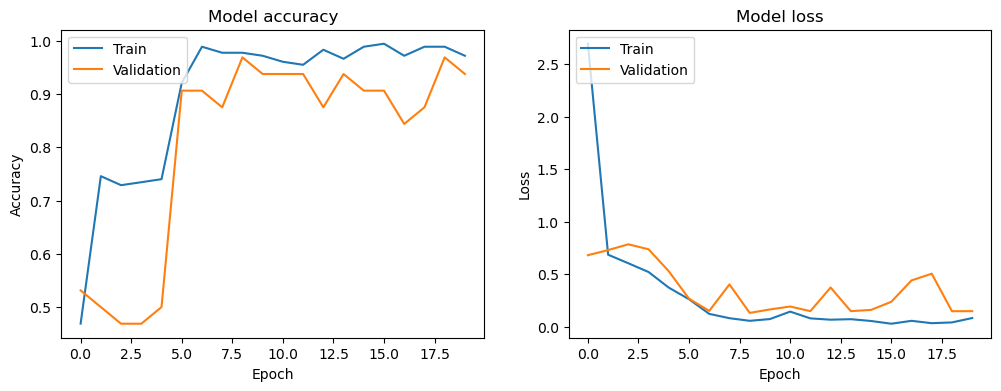

In [15]:
plot_history(history)

In [19]:
import pandas as pd

def history_to_dataframe(history):
    """
    Converts the training history to a pandas DataFrame.

    :param history: History object from Keras model training.
    :return: DataFrame with training and validation loss and accuracy for each epoch.
    """
    data = {
        'Epoch': range(1, len(history.history['loss']) + 1),
        'Training Loss': history.history['loss'],
        'Validation Loss': history.history['val_loss'],
        'Training Accuracy': history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy']
    }

    return pd.DataFrame(data)

# Example usage:
# df_history = history_to_dataframe(history)
# print(df_history)


In [20]:
df_loss = history_to_dataframe(history)
print(df_loss)

    Epoch  Training Loss  Validation Loss  Training Accuracy  \
0       1       2.693810         0.680182           0.468927   
1       2       0.685043         0.729100           0.745763   
2       3       0.603620         0.784158           0.728814   
3       4       0.520207         0.736676           0.734375   
4       5       0.371604         0.527269           0.740113   
5       6       0.261169         0.266032           0.920904   
6       7       0.121654         0.149837           0.988701   
7       8       0.080503         0.402414           0.977401   
8       9       0.055720         0.130998           0.977401   
9      10       0.072272         0.163949           0.971751   
10     11       0.143291         0.191712           0.960452   
11     12       0.078847         0.147638           0.954802   
12     13       0.066271         0.372834           0.983051   
13     14       0.071255         0.147855           0.966102   
14     15       0.053988         0.15945

In [23]:
latex_table = df_loss.to_latex(index=False, float_format="%.3f")

# Print the LaTeX table
print(latex_table)

\begin{tabular}{rrrrr}
\toprule
Epoch & Training Loss & Validation Loss & Training Accuracy & Validation Accuracy \\
\midrule
1 & 2.694 & 0.680 & 0.469 & 0.531 \\
2 & 0.685 & 0.729 & 0.746 & 0.500 \\
3 & 0.604 & 0.784 & 0.729 & 0.469 \\
4 & 0.520 & 0.737 & 0.734 & 0.469 \\
5 & 0.372 & 0.527 & 0.740 & 0.500 \\
6 & 0.261 & 0.266 & 0.921 & 0.906 \\
7 & 0.122 & 0.150 & 0.989 & 0.906 \\
8 & 0.081 & 0.402 & 0.977 & 0.875 \\
9 & 0.056 & 0.131 & 0.977 & 0.969 \\
10 & 0.072 & 0.164 & 0.972 & 0.938 \\
11 & 0.143 & 0.192 & 0.960 & 0.938 \\
12 & 0.079 & 0.148 & 0.955 & 0.938 \\
13 & 0.066 & 0.373 & 0.983 & 0.875 \\
14 & 0.071 & 0.148 & 0.966 & 0.938 \\
15 & 0.054 & 0.159 & 0.989 & 0.906 \\
16 & 0.028 & 0.237 & 0.994 & 0.906 \\
17 & 0.056 & 0.440 & 0.972 & 0.844 \\
18 & 0.033 & 0.504 & 0.989 & 0.875 \\
19 & 0.040 & 0.147 & 0.989 & 0.969 \\
20 & 0.082 & 0.148 & 0.972 & 0.938 \\
\bottomrule
\end{tabular}



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def get_activations(model, img_path, preprocess_func):
    """
    Generates the activations of a model for a given input image.

    :param model: The trained Keras model.
    :param img_path: Path to the input image.
    :param preprocess_func: Preprocessing function to apply to the image.
    :return: Activations from all layers of the model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)

    # Create a model that will return the outputs of each layer in the original model
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Get the activations
    activations = activation_model.predict(img_array)

    return activations

def plot_activations(activations, model):
    """
    Plots the activations of each layer in the model.

    :param activations: The activations of each layer of the model.
    :param model: The trained Keras model.
    """
    for layer_activation, layer in zip(activations, model.layers):
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        num_cols = num_features // 16

        display_grid = np.zeros((size * num_cols, size * 16))

        for col in range(num_cols):
            for row in range(16):
                channel_image = layer_activation[0, :, :, col * 16 + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer.name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Example usage
# Assuming 'model' is your trained Keras model and 'preprocess_input' is the appropriate preprocessing function
# img_path = 'path_to_your_image.jpg'
# activations = get_activations(model, img_path, preprocess_input)
# plot_activations(activations, model)


In [ ]:
img_path = 'path_to_your_image.jpg'
activations = get_activations(model, img_path, preprocess_input)
plot_activations(activations, model)